### Name - Vyom Chauhan
### Student ID- 30830192
### Question 2

In [1]:
# importing required libraries
library(reshape2)
library(ggplot2)

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
# reading test and train data
train_df <- read.csv('Task1A_train.csv')

In [3]:
# splitting df into test and train-data and lables 
train.data <- train_df[1]
train.label <- train_df[2]

In [4]:
# defining knn regressor function 
knn <- function(train.data, train.label, test.data, K=4){
    # straight line distance
    distance = 'euclidean'
    # number of samples in train and test data
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    # distance between data points in test and train samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    # defining a dummy variable to store test data
    dummy <- test.data
    # for each test sample
    for (i in 1:test.len){
        # find its k nearrest neighbours from training sample
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        # calculate predicted label based mean of the nearest k train lables
        dummy[i, 1] = mean(train.label[nn,])
    }
    # returning class labels as output
    return (dummy)
}

In [16]:
# Question 2.1
# cv function splits the data into k-folds for cross validation
# returns the train and test errors for different folds of data
# defining the function
cv  <- function(train.data, train.label, K, numFold){
    # initializing the misclassification df
    miss <- data.frame('K'=1:15, 'train'=rep(0,15), 'test'=rep(0,15))
    # for different values of k in KNN-Regressor
    for (k in 1:K){    
        # generates folds based on the number of rows and numFolds
        folds <- cut(seq(1, nrow(train_df)), breaks=numFold ,labels=FALSE)
        for(i in 1:10){
            # generates indexes based on fold
            testIndexes <- which(folds==i, arr.ind=TRUE)
            # creating a df of test and train data and labels to be used of cross validation
            test.data.cv <- data.frame(train.data[testIndexes, ])
            train.data.cv <- data.frame(train.data[-testIndexes, ])
            test.label.cv <- data.frame(train.label[testIndexes, ])
            train.label.cv <- data.frame(train.label[-testIndexes, ])
            # renaming the column names of the generated dfs
            colnames(train.data.cv) <- 'x1'
            colnames(test.data.cv) <- 'x1'
            colnames(train.label.cv) <- 'y'
            colnames(test.label.cv) <- 'y'
            # mean absolute train error
            miss[k,'train'] <- miss[k,'train'] + sum(abs(knn(train.data.cv, train.label.cv, train.data.cv, K=k) - train.label.cv))/nrow(train.data.cv)
            # mean absolute test error
            miss[k,'test'] <-  miss[k,'test'] + sum(abs(knn(train.data.cv, train.label.cv, test.data.cv, K=k) - test.label.cv))/nrow(test.data.cv)
         }
        # averaging the test and train errors for the 10 folds
         miss[k,'train'] <- miss[k,'train']/10
         miss[k,'test'] <- miss[k,'test']/10
    }
    # returning the misclassification errors
    return (miss)
}

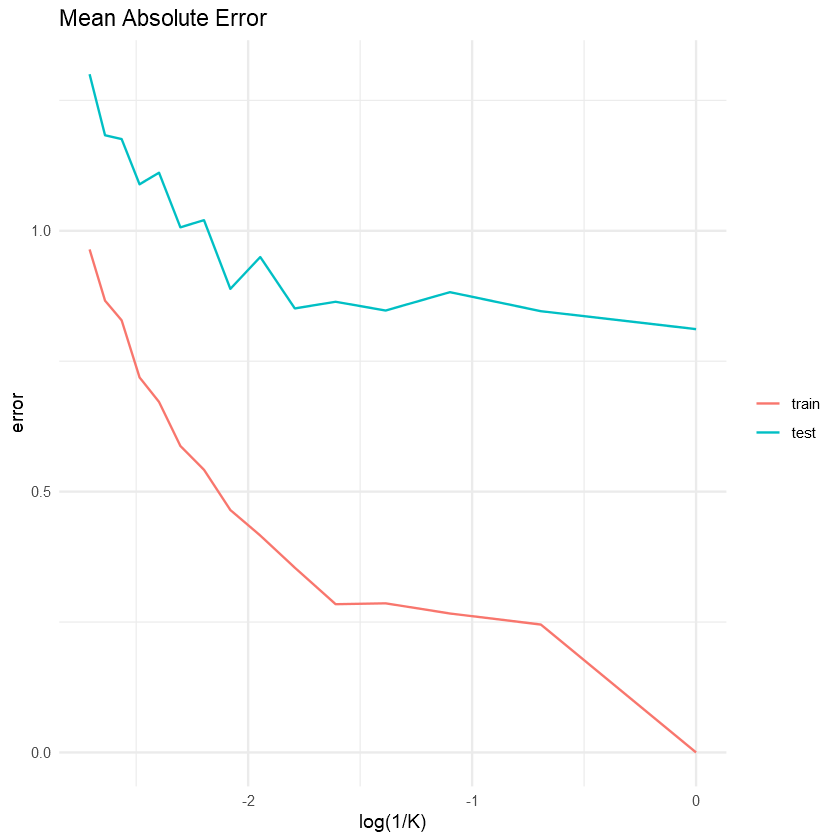

In [17]:
# Question 2.2
# reshape for visualization and calling the cv function
miss.m <- melt(cv(train.data, train.label, 15, 10), id='K') 
names(miss.m) <- c('K', 'type', 'error')
# plot mean asbsolute error for train and test data sets
ggplot(data=miss.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Mean Absolute Error")

####  Here, I've chosen the Mean Absolute Error(MAE) as the error function. MAE measures the average magnitude of errors in prediction irrespective of their direction.

### Question 2.3
#### The optimum value of K in terms of testing error is 4. Here, I observe that the the testing error further falls on decreasing the value of k which is quite interesting
#### Increasing the model complexity i.e. decreasing K leads to overfitting as model memorizes the training data and the training error reduces to 0.
#### Whereas, decreasing the model complexity i.e increasing K leads to underfitting as the model neither fits well to training data and nor to the test data (model has high test and training error).
#### The right side of the graph log(1/K) = (-0.5, 0) shows overfitted models while the left side of the graph log(1/K) = (-3.0, -2.5) shows underfitted models.